In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as st
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

%matplotlib inline

In [2]:
# Importing 'customers' data sheet
customers = pd.read_csv("customers.csv")
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [3]:
# Data Cleaning:
## Duplication check for customer id: id has to be unique for each customer
customers.drop_duplicates('client_id')

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [4]:
## Cleaning test entries
customers = customers[customers['client_id'].astype(str).str.startswith('c_')]
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [5]:
## Irregularity Error: For 'gender' column setting a fixed format ('f' & 'm') and deleting the values that doesnt fit this
valid_gender = ['f','m']
customers = customers[customers['sex'].isin(valid_gender)]
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [6]:
## Adding age column
import datetime
now = datetime.datetime.now()
now.year

2021

In [7]:
## Adding age column
age = (now.year - customers['birth'])
age = pd.DataFrame(age)
age.rename(columns={'birth': 'age'}, inplace=True)
age

,age
0,54
1,46
2,37
3,59
4,78
...,...
8618,65
8619,51
8620,47
8621,53


In [8]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
age['age_interval'] = pd.cut(age.age, bins, labels = labels,include_lowest = True)
age

,age,age_interval
0,54,50-59
1,46,40-49
2,37,30-39
3,59,50-59
4,78,70+
...,...,...
8618,65,60-69
8619,51,50-59
8620,47,40-49
8621,53,50-59


In [9]:
## Merging DataFrames to finalize the 'customers' dataframe
customers= pd.merge(customers, age, left_index=True, right_index=True)
customers

,client_id,sex,birth,age,age_interval
0,c_4410,f,1967,54,50-59
1,c_7839,f,1975,46,40-49
2,c_1699,f,1984,37,30-39
3,c_5961,f,1962,59,50-59
4,c_5320,m,1943,78,70+
...,...,...,...,...,...
8618,c_7920,m,1956,65,60-69
8619,c_7403,f,1970,51,50-59
8620,c_5119,m,1974,47,40-49
8621,c_5643,f,1968,53,50-59


In [10]:
## Customer's distribution by sex and information about their age distribution per gender
customers[["sex","age"]].groupby("sex").describe()

age                                                    
      count       mean        std   min   25%   50%   75%   max
sex                                                            
f    4490.0  43.010245  17.096698  17.0  29.0  42.0  55.0  92.0
m    4131.0  42.413701  16.718043  17.0  29.0  41.0  55.0  92.0

In [11]:
# Importing 'products' data sheet
products = pd.read_csv("products.csv")
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [12]:
# Data Cleaning:
## Duplication check for product id: id has to be unique for each product
products.drop_duplicates('id_prod')
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [13]:
## Cleaning test entries
products = products[~products['id_prod'].astype(str).str.startswith('T_')]
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [14]:
## Selecting the rows with positive values as negative value of a sale is not possible
products.loc[products['price'] >= 0]
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [15]:
## Price distribution of products per category
products[["categ","price"]].groupby("categ").describe()

price                                                                
        count        mean        std    min      25%     50%      75%     max
categ                                                                        
0      2308.0   11.732795   7.565755   0.62   5.5875   10.32   16.655   40.99
1       739.0   25.531421  15.425162   2.00  13.3900   22.99   33.990   80.99
2       239.0  108.354686  49.561431  30.99  71.0650  101.99  136.530  300.00

In [16]:
# Importing 'transaction' data sheet
transactions = pd.read_csv("transactions.csv")
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [17]:
# Data Cleaning:
## Cleaning test entries
transactions = transactions[~transactions['id_prod'].astype(str).str.startswith('T_')]
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [18]:
### session_id is the basket id of a client (so it matches with one client_id).
### Several products can be purchased in one session, therefore one session_id can have more than one product_id.

In [19]:
## Dividing 'date'column into 2 columns as 'Date' and 'Purchased_time'
transactions['Date'] = pd.to_datetime(transactions['date']).dt.date.astype(str)
transactions['Purchase_time'] = pd.to_datetime(transactions['date']).dt.time.astype(str)
transactions=transactions.drop(columns=['date'])
transactions

<ipython-input-19-67591024ff9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['Date'] = pd.to_datetime(transactions['date']).dt.date.astype(str)
<ipython-input-19-67591024ff9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['Purchase_time'] = pd.to_datetime(transactions['date']).dt.time.astype(str)


,id_prod,session_id,client_id,Date,Purchase_time
0,0_1518,s_211425,c_103,2022-05-20,13:21:29.043970
1,1_251,s_158752,c_8534,2022-02-02,07:55:19.149409
2,0_1277,s_225667,c_6714,2022-06-18,15:44:33.155329
3,2_209,s_52962,c_6941,2021-06-24,04:19:29.835891
4,0_1509,s_325227,c_4232,2023-01-11,08:22:08.194479
...,...,...,...,...,...
679527,0_1551,s_150195,c_8489,2022-01-15,13:05:06.246925
679528,1_639,s_181434,c_4370,2022-03-19,16:03:23.429229
679529,0_1425,s_314704,c_304,2022-12-20,04:33:37.584749
679530,0_1994,s_63204,c_2227,2021-07-16,20:36:35.350579


In [20]:
## Dividing 'Date'column into 3 columns as 'Year','Month' and 'Day'
transactions['Purchase_Year'] = pd.to_datetime(transactions['Date']).dt.year
transactions['Purchase_Month'] = pd.to_datetime(transactions['Date']).dt.month
transactions['Purchase_Day'] = pd.to_datetime(transactions['Date']).dt.day
transactions=transactions.drop(columns=['Date'])
transactions

,id_prod,session_id,client_id,Purchase_time,Purchase_Year,Purchase_Month,Purchase_Day
0,0_1518,s_211425,c_103,13:21:29.043970,2022,5,20
1,1_251,s_158752,c_8534,07:55:19.149409,2022,2,2
2,0_1277,s_225667,c_6714,15:44:33.155329,2022,6,18
3,2_209,s_52962,c_6941,04:19:29.835891,2021,6,24
4,0_1509,s_325227,c_4232,08:22:08.194479,2023,1,11
...,...,...,...,...,...,...,...
679527,0_1551,s_150195,c_8489,13:05:06.246925,2022,1,15
679528,1_639,s_181434,c_4370,16:03:23.429229,2022,3,19
679529,0_1425,s_314704,c_304,04:33:37.584749,2022,12,20
679530,0_1994,s_63204,c_2227,20:36:35.350579,2021,7,16


In [21]:
## Sales distribution of each product
a = transactions[['id_prod','session_id']].groupby("id_prod").count()
a = a.set_axis(['Total_Number'], axis=1, inplace=False)
a = a.sort_values(by=['Total_Number'], ascending=False)
a

,Total_Number
id_prod,
1_369,2252
1_417,2189
1_414,2180
1_498,2128
1_425,2096
...,...
0_1284,1
0_549,1
0_1498,1


In [22]:
## Purchase distribution of each customer
b =transactions[['client_id','session_id']].groupby("client_id").count()
b = b.set_axis(['Total_Number'], axis=1, inplace=False)
b = b.sort_values(by=['Total_Number'], ascending=False)
b

,Total_Number
client_id,
c_1609,25488
c_6714,9187
c_3454,6773
c_4958,5195
c_3263,403
...,...
c_240,1
c_5962,1
c_8351,1


In [23]:
## Sales distribution of products & customer basket size by customer
transactions[['id_prod','session_id','client_id']].groupby("client_id").describe()

id_prod                     session_id                      
            count unique     top freq      count unique       top freq
client_id                                                             
c_1            39     19   0_513    4         39     33  s_114737    5
c_10           58     27  0_1335    4         58     34   s_17374    5
c_100           8      6   1_547    3          8      5   s_73929    3
c_1000        125     52   1_369    6        125     93  s_161640    6
c_1001        102     56  0_1335    4        102     47    s_3041    6
...           ...    ...     ...  ...        ...    ...       ...  ...
c_995          14      8  0_1397    3         14      9  s_300731    2
c_996          95     41   1_434    5         95     79  s_260276    2
c_997          59     23   1_388    4         59     24  s_251022    4
c_998          53     28     2_9    4         53     23  s_140612    9
c_999          46     22   1_727    4         46     42  s_330231    2

[8600 rows x 8 columns]

In [24]:
## Performed an inner join as I want the dataframe with only those rows that have common characteristics. 
## An inner join requires each row in the two joined dataframes to have matching column values. 
merging_df= pd.merge(transactions, customers, left_on='client_id', right_on='client_id')
merging_df

,id_prod,session_id,client_id,Purchase_time,Purchase_Year,Purchase_Month,Purchase_Day,sex,birth,age,age_interval
0,0_1518,s_211425,c_103,13:21:29.043970,2022,5,20,f,1986,35,30-39
1,0_1627,s_225494,c_103,05:55:31.816994,2022,6,18,f,1986,35,30-39
2,0_1104,s_338755,c_103,17:31:06.898425,2023,2,8,f,1986,35,30-39
3,0_1390,s_23078,c_103,06:18:39.939761,2021,4,20,f,1986,35,30-39
4,0_1547,s_179629,c_103,19:54:53.904123,2022,3,15,f,1986,35,30-39
...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1509,s_34762,c_8114,08:17:35.835342,2021,5,15,m,1962,59,50-59
679328,1_152,s_116675,c_240,17:12:27.637349,2021,11,8,m,1998,23,18-29
679329,2_207,s_42418,c_305,04:31:16.088314,2021,6,1,f,1996,25,18-29
679330,1_521,s_284060,c_305,00:38:49.629165,2022,10,18,f,1996,25,18-29


In [25]:
## Performed a left join as it returns a dataframe containing all the rows of the left dataframe.
## All the non-matching rows of the left dataframe contain NaN for the columns in the right dataframe (in this case doesn't exist)
final_df = merging_df.merge(products,how='left', left_on='id_prod', right_on='id_prod')
final_df

,id_prod,session_id,client_id,Purchase_time,Purchase_Year,Purchase_Month,Purchase_Day,sex,birth,age,age_interval,price,categ
0,0_1518,s_211425,c_103,13:21:29.043970,2022,5,20,f,1986,35,30-39,4.18,0.0
1,0_1627,s_225494,c_103,05:55:31.816994,2022,6,18,f,1986,35,30-39,3.99,0.0
2,0_1104,s_338755,c_103,17:31:06.898425,2023,2,8,f,1986,35,30-39,13.21,0.0
3,0_1390,s_23078,c_103,06:18:39.939761,2021,4,20,f,1986,35,30-39,19.37,0.0
4,0_1547,s_179629,c_103,19:54:53.904123,2022,3,15,f,1986,35,30-39,8.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1509,s_34762,c_8114,08:17:35.835342,2021,5,15,m,1962,59,50-59,4.99,0.0
679328,1_152,s_116675,c_240,17:12:27.637349,2021,11,8,m,1998,23,18-29,11.06,1.0
679329,2_207,s_42418,c_305,04:31:16.088314,2021,6,1,f,1996,25,18-29,50.99,2.0
679330,1_521,s_284060,c_305,00:38:49.629165,2022,10,18,f,1996,25,18-29,22.99,1.0


In [26]:
# Shifting columns into desired places
second_column = final_df.pop('price')
final_df.insert(1, 'price', second_column)
final_df

,id_prod,price,session_id,client_id,Purchase_time,Purchase_Year,Purchase_Month,Purchase_Day,sex,birth,age,age_interval,categ
0,0_1518,4.18,s_211425,c_103,13:21:29.043970,2022,5,20,f,1986,35,30-39,0.0
1,0_1627,3.99,s_225494,c_103,05:55:31.816994,2022,6,18,f,1986,35,30-39,0.0
2,0_1104,13.21,s_338755,c_103,17:31:06.898425,2023,2,8,f,1986,35,30-39,0.0
3,0_1390,19.37,s_23078,c_103,06:18:39.939761,2021,4,20,f,1986,35,30-39,0.0
4,0_1547,8.99,s_179629,c_103,19:54:53.904123,2022,3,15,f,1986,35,30-39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1509,4.99,s_34762,c_8114,08:17:35.835342,2021,5,15,m,1962,59,50-59,0.0
679328,1_152,11.06,s_116675,c_240,17:12:27.637349,2021,11,8,m,1998,23,18-29,1.0
679329,2_207,50.99,s_42418,c_305,04:31:16.088314,2021,6,1,f,1996,25,18-29,2.0
679330,1_521,22.99,s_284060,c_305,00:38:49.629165,2022,10,18,f,1996,25,18-29,1.0


In [27]:
# Shifting columns into desired places
third_column = final_df.pop('categ')
final_df.insert(2, 'categ', third_column)
final_df

,id_prod,price,categ,session_id,client_id,Purchase_time,Purchase_Year,Purchase_Month,Purchase_Day,sex,birth,age,age_interval
0,0_1518,4.18,0.0,s_211425,c_103,13:21:29.043970,2022,5,20,f,1986,35,30-39
1,0_1627,3.99,0.0,s_225494,c_103,05:55:31.816994,2022,6,18,f,1986,35,30-39
2,0_1104,13.21,0.0,s_338755,c_103,17:31:06.898425,2023,2,8,f,1986,35,30-39
3,0_1390,19.37,0.0,s_23078,c_103,06:18:39.939761,2021,4,20,f,1986,35,30-39
4,0_1547,8.99,0.0,s_179629,c_103,19:54:53.904123,2022,3,15,f,1986,35,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1509,4.99,0.0,s_34762,c_8114,08:17:35.835342,2021,5,15,m,1962,59,50-59
679328,1_152,11.06,1.0,s_116675,c_240,17:12:27.637349,2021,11,8,m,1998,23,18-29
679329,2_207,50.99,2.0,s_42418,c_305,04:31:16.088314,2021,6,1,f,1996,25,18-29
679330,1_521,22.99,1.0,s_284060,c_305,00:38:49.629165,2022,10,18,f,1996,25,18-29


In [28]:
# Shifting columns into desired places
ninth_column = final_df.pop('client_id')
final_df.insert(8, 'client_id', ninth_column)
final_df

,id_prod,price,categ,session_id,Purchase_time,Purchase_Year,Purchase_Month,Purchase_Day,client_id,sex,birth,age,age_interval
0,0_1518,4.18,0.0,s_211425,13:21:29.043970,2022,5,20,c_103,f,1986,35,30-39
1,0_1627,3.99,0.0,s_225494,05:55:31.816994,2022,6,18,c_103,f,1986,35,30-39
2,0_1104,13.21,0.0,s_338755,17:31:06.898425,2023,2,8,c_103,f,1986,35,30-39
3,0_1390,19.37,0.0,s_23078,06:18:39.939761,2021,4,20,c_103,f,1986,35,30-39
4,0_1547,8.99,0.0,s_179629,19:54:53.904123,2022,3,15,c_103,f,1986,35,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1509,4.99,0.0,s_34762,08:17:35.835342,2021,5,15,c_8114,m,1962,59,50-59
679328,1_152,11.06,1.0,s_116675,17:12:27.637349,2021,11,8,c_240,m,1998,23,18-29
679329,2_207,50.99,2.0,s_42418,04:31:16.088314,2021,6,1,c_305,f,1996,25,18-29
679330,1_521,22.99,1.0,s_284060,00:38:49.629165,2022,10,18,c_305,f,1996,25,18-29


In [29]:
## Data Cleaning for the products that does not have a price = REF 0_2245
final_df = final_df[final_df['price'].notna()]
final_df = pd.DataFrame(final_df)
final_df

,id_prod,price,categ,session_id,Purchase_time,Purchase_Year,Purchase_Month,Purchase_Day,client_id,sex,birth,age,age_interval
0,0_1518,4.18,0.0,s_211425,13:21:29.043970,2022,5,20,c_103,f,1986,35,30-39
1,0_1627,3.99,0.0,s_225494,05:55:31.816994,2022,6,18,c_103,f,1986,35,30-39
2,0_1104,13.21,0.0,s_338755,17:31:06.898425,2023,2,8,c_103,f,1986,35,30-39
3,0_1390,19.37,0.0,s_23078,06:18:39.939761,2021,4,20,c_103,f,1986,35,30-39
4,0_1547,8.99,0.0,s_179629,19:54:53.904123,2022,3,15,c_103,f,1986,35,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1509,4.99,0.0,s_34762,08:17:35.835342,2021,5,15,c_8114,m,1962,59,50-59
679328,1_152,11.06,1.0,s_116675,17:12:27.637349,2021,11,8,c_240,m,1998,23,18-29
679329,2_207,50.99,2.0,s_42418,04:31:16.088314,2021,6,1,c_305,f,1996,25,18-29
679330,1_521,22.99,1.0,s_284060,00:38:49.629165,2022,10,18,c_305,f,1996,25,18-29


In [30]:
# VARIOUS SALES INDICATORS

In [31]:
# Different Indicators (KPIs) & Graphs around Turnover
## First Indicator : Revenue Per Client
## To have an overview of turnover distribution over each client
turnover_per_client = final_df.drop(columns=['categ','session_id','Purchase_time','Purchase_Year','Purchase_Month','Purchase_Day',
                                           'birth','age_interval'])
turnover_per_client = pd.DataFrame(turnover_per_client)
turnover_per_client

,id_prod,price,client_id,sex,age
0,0_1518,4.18,c_103,f,35
1,0_1627,3.99,c_103,f,35
2,0_1104,13.21,c_103,f,35
3,0_1390,19.37,c_103,f,35
4,0_1547,8.99,c_103,f,35
...,...,...,...,...,...
679327,0_1509,4.99,c_8114,m,59
679328,1_152,11.06,c_240,m,23
679329,2_207,50.99,c_305,f,25
679330,1_521,22.99,c_305,f,25


In [32]:
# Different Indicators (KPIs) & Graphs around Turnover
## First Indicator : Revenue Per Client
## To have an overview of turnover distribution over each client
turnover_per_client[['id_prod','price','client_id','age']].groupby("client_id").describe()

price                                                         \
           count       mean        std    min      25%     50%      75%   
client_id                                                                 
c_1         39.0  14.312308   9.205882   3.99  10.3000  11.990  15.9500   
c_10        58.0  23.337931  15.190882   7.99  12.9900  20.990  27.9925   
c_100        8.0  31.856250  43.319624  11.39  14.9900  15.990  21.2375   
c_1000     125.0  18.095120   8.452405   3.99  11.7200  19.080  24.9900   
c_1001     102.0  17.773137  28.848323   3.99  10.6125  15.745  17.9900   
...          ...        ...        ...    ...      ...     ...      ...   
c_995       14.0  13.529286   6.303332   5.99   8.7450  13.375  15.2675   
c_996       95.0  17.111368   8.545822   3.99  11.9900  15.870  19.9900   
c_997       59.0  25.254407  18.828391   3.99  10.7100  16.700  39.2500   
c_998       53.0  52.450566  51.375920   6.99  13.9900  46.990  57.9900   
c_999       46.0  15.247826   7.854364   4.33   8.1275  15.990  19.4975   

                     age                                           
              max  count  mean  std   min   25%   50%   75%   max  
client_id                                                          
c_1         54.87   39.0  66.0  0.0  66.0  66.0  66.0  66.0  66.0  
c_10        69.99   58.0  65.0  0.0  65.0  65.0  65.0  65.0  65.0  
c_100      138.53    8.0  29.0  0.0  29.0  29.0  29.0  29.0  29.0  
c_1000      41.99  125.0  55.0  0.0  55.0  55.0  55.0  55.0  55.0  
c_1001     300.00  102.0  39.0  0.0  39.0  39.0  39.0  39.0  39.0  
...           ...    ...   ...  ...   ...   ...   ...   ...   ...  
c_995       26.99   14.0  66.0  0.0  66.0  66.0  66.0  66.0  66.0  
c_996       56.07   95.0  51.0  0.0  51.0  51.0  51.0  51.0  51.0  
c_997       60.99   59.0  27.0  0.0  27.0  27.0  27.0  27.0  27.0  
c_998      203.99   53.0  20.0  0.0  20.0  20.0  20.0  20.0  20.0  
c_999       28.99   46.0  57.0  0.0  57.0  57.0  57.0  57.0  57.0  

[8600 rows x 16 columns]

In [33]:
# Different Indicators (KPIs) & Graphs around Turnover
## First Indicator : Revenue Per Client
## To have an overview of turnover distribution over each client
turnover_per_client[['id_prod','client_id']].groupby("client_id").describe()

id_prod                    
            count unique     top freq
client_id                            
c_1            39     19   0_513    4
c_10           58     27  0_1335    4
c_100           8      6   1_547    3
c_1000        125     52   1_369    6
c_1001        102     56  0_1335    4
...           ...    ...     ...  ...
c_995          14      8  0_1397    3
c_996          95     41   1_434    5
c_997          59     23   1_388    4
c_998          53     28     2_9    4
c_999          46     22   1_727    4

[8600 rows x 4 columns]

In [34]:
# Different Indicators (KPIs) & Graphs around Turnover
## First Indicator : Revenue Per Client
## To have an overview of turnover distribution over each client
turnover_per_client = turnover_per_client.groupby(['sex','client_id'])[["price"]].sum()
turnover_per_client = turnover_per_client.set_axis(['Total_CA'], axis=1, inplace=False)
turnover_per_client = pd.DataFrame(turnover_per_client)
turnover_per_client.reset_index('sex',inplace=True)
turnover_per_client = turnover_per_client.sort_values(by=['Total_CA'], ascending=False)
turnover_per_client

,sex,Total_CA
client_id,,
c_1609,m,324033.35
c_4958,m,289760.34
c_6714,f,153598.92
c_3454,m,113637.93
c_3263,f,5276.87
...,...,...
c_4648,m,11.20
c_240,m,11.06
c_8114,m,9.98


In [35]:
# Different Indicators (KPIs) & Graphs around Turnover
## First Indicator : Revenue Per Client (Without 4 Big Clients)
## To have an overview of turnover distribution over each client
turnover_per_client2 = turnover_per_client.iloc[4: , :]
turnover_per_client2 = pd.DataFrame(turnover_per_client2)
turnover_per_client2

,sex,Total_CA
client_id,,
c_3263,f,5276.87
c_1570,f,5271.62
c_2899,f,5214.05
c_2140,f,5208.82
c_7319,f,5155.77
...,...,...
c_4648,m,11.20
c_240,m,11.06
c_8114,m,9.98


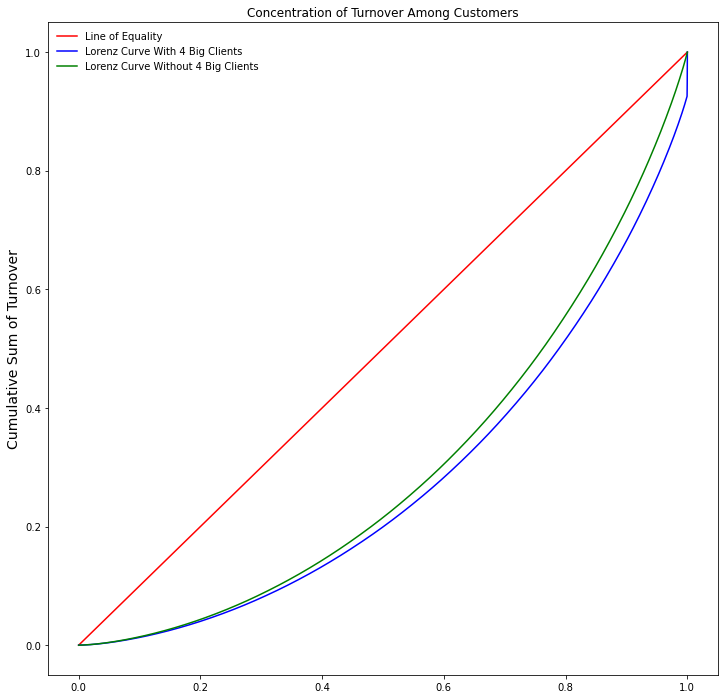

In [36]:
# Different Indicators (KPIs) & Graphs around Turnover
## First Indicator : Revenue Per Client : LORENZ CURVE
## To have an overview of turnover distribution over each client

fig, ax = plt.subplots(figsize=[12,12])
## With 4 big Clients
customer = turnover_per_client['Total_CA']
cust = customer.values
n = len(cust)
lorenz = np.cumsum(np.sort(cust)) / cust.sum()
lorenz = np.insert(lorenz, 0, 0)
xaxis = np.linspace(0-1/n,1+1/n,n+1)

## Without 4 big Clients
customer2 = turnover_per_client2['Total_CA']
cust2 = customer2.values
i = len(cust2)
lorenz2 = np.cumsum(np.sort(cust2)) / cust2.sum()
lorenz2 = np.insert(lorenz2, 0, 0)
xax = np.linspace(0-1/i,1+1/i,i+1)


plt.plot([0,1], [0,1], color='red', label = 'Line of Equality')
plt.plot(xaxis,lorenz, color='blue', label = 'Lorenz Curve With 4 Big Clients')
plt.plot(xax,lorenz2, color='green', label = 'Lorenz Curve Without 4 Big Clients')
plt.title("Concentration of Turnover Among Customers")
plt.ylabel('Cumulative Sum of Turnover', fontsize=14)
plt.legend(loc = 'best', frameon = False)
plt.show()

In [37]:
## 50% of CA is concentrated by 21% of the biggest clients (Including 4 big clients):
np.interp(0.5, lorenz, np.linspace(0,1,n+1))

0.7890937581005314

In [38]:
## 80% of CA is concentrated by 4% of the biggest clients (Including 4 big clients):
np.interp(0.8, lorenz, np.linspace(0,1,n+1))

0.9550598252458954

In [39]:
## Gini index:
# < 0.2 represents perfect income equality
# 0.2–0.3 relative equality 
# 0.3–0.4 adequate equality
# 0.4–0.5 big income gap
# above 0.5 represents severe income gap
## Gini Index With 4 big Clients:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC
gini = 2*S
gini

0.44638654137401124

In [40]:
## 50% of CA is concentrated by 24% of the biggest clients (Discluding 4 big clients):
np.interp(0.5, lorenz2, np.linspace(0,1,i+1))

0.762434296510581

In [41]:
## 80% of CA is concentrated by 7% of the biggest clients (Discluding 4 big clients):
np.interp(0.8, lorenz2, np.linspace(0,1,i+1))

0.9292805798196097

In [42]:
## Gini index:
# < 0.2 represents perfect income equality
# 0.2–0.3 relative equality 
# 0.3–0.4 adequate equality
# 0.4–0.5 big income gap
# above 0.5 represents severe income gap
## Gini Index Without 4 big Clients:
AUC = (lorenz2.sum() -lorenz2[-1]/2 -lorenz2[0]/2)/i 
S = 0.5 - AUC
gini = 2*S
gini

0.4026168654949772

In [43]:
# Different Indicators (KPIs) & Graphs around Turnover
## Second Indicator : Number of sales per product
## In order to understand the demand of which product is sold MORE or LESS
sold_book_analysis = final_df.drop(columns=['Purchase_time','Purchase_Year','Purchase_Month','Purchase_Day',
                                           'birth','age_interval','sex','age'])
sold_book_analysis = pd.DataFrame(sold_book_analysis)
sold_book_analysis

,id_prod,price,categ,session_id,client_id
0,0_1518,4.18,0.0,s_211425,c_103
1,0_1627,3.99,0.0,s_225494,c_103
2,0_1104,13.21,0.0,s_338755,c_103
3,0_1390,19.37,0.0,s_23078,c_103
4,0_1547,8.99,0.0,s_179629,c_103
...,...,...,...,...,...
679327,0_1509,4.99,0.0,s_34762,c_8114
679328,1_152,11.06,1.0,s_116675,c_240
679329,2_207,50.99,2.0,s_42418,c_305
679330,1_521,22.99,1.0,s_284060,c_305


In [44]:
# Different Indicators (KPIs) & Graphs around Turnover
## Second Indicator : Number of sales per product
## Top 5 Products sold per category :
x = pd.DataFrame(sold_book_analysis[['id_prod','categ','session_id','price']].groupby(["categ","id_prod"]).agg({'session_id':'count', 'price': 'sum'}))
x = x.set_axis(['Number_of_Sales','Total_CA'], axis=1, inplace=False)
x = x.sort_values(['categ','Number_of_Sales'],ascending=False).groupby('categ').head(5)
x

Number_of_Sales  Total_CA
categ id_prod                           
2.0   2_102               1027  60736.78
      2_135               1005  69334.95
      2_112                968  65407.76
      2_39                 915  53060.85
      2_37                 882  43209.18
1.0   1_369               2252  54025.48
      1_417               2189  45947.11
      1_414               2180  51949.40
      1_498               2128  49731.36
      1_425               2096  35611.04
0.0   0_1422              1292  14741.72
      0_1431              1282  14089.18
      0_1425              1266  16445.34
      0_1432              1254  19261.44
      0_1411              1246  11201.54

In [45]:
# Different Indicators (KPIs) & Graphs around Turnover
## Top 5 Products with the highest turnover :
xx = pd.DataFrame(sold_book_analysis[['id_prod','categ','session_id','price']].groupby(["categ","id_prod"]).agg({'session_id':'count', 'price': 'sum'}))
xx = xx.set_axis(['Number_of_Sales','Total_CA'], axis=1, inplace=False)
xx= xx.sort_values(['categ','Total_CA'],ascending=False).groupby('categ').head(5)
xx

Number_of_Sales  Total_CA
categ id_prod                           
2.0   2_159                650  94893.50
      2_135               1005  69334.95
      2_112                968  65407.76
      2_102               1027  60736.78
      2_209                814  56971.86
1.0   1_395               1875  54356.25
      1_369               2252  54025.48
      1_414               2180  51949.40
      1_383               1776  51486.24
      1_498               2128  49731.36
0.0   0_1441              1235  23452.65
      0_1421              1151  23008.49
      0_1414              1150  22287.00
      0_1451              1085  21689.15
      0_1417              1188  21372.12

In [46]:
# Different Indicators (KPIs) & Graphs around Turnover
## Second Indicator : Number of sales per product
## Least 5 Products sold per category 
y = pd.DataFrame(sold_book_analysis[['id_prod','categ','session_id','price']].groupby(["categ","id_prod"]).agg({'session_id':'count', 'price': 'sum'}))
y = y.set_axis(['Number_of_Sales','Total_CA'], axis=1, inplace=False)
y = y.sort_values(['categ','Number_of_Sales'],ascending=True).groupby('categ').head(5)
y

Number_of_Sales  Total_CA
categ id_prod                           
0.0   0_1151                 1      2.99
      0_1284                 1      1.38
      0_1379                 1      2.99
      0_1498                 1      2.48
      0_1539                 1      0.99
1.0   1_402                  2     69.04
      1_420                  2     14.24
      1_514                  2    135.32
      1_146                  3     95.94
      1_404                  3     29.55
2.0   2_23                   1    115.99
      2_81                   1     86.99
      2_98                   1    149.74
      2_77                   2    291.98
      2_93                   2    157.98

In [47]:
# Different Indicators (KPIs) & Graphs around Turnover
## Least 5 Products with the highest turnover :
yy = pd.DataFrame(sold_book_analysis[['id_prod','categ','session_id','price']].groupby(["categ","id_prod"]).agg({'session_id':'count', 'price': 'sum'}))
yy = yy.set_axis(['Number_of_Sales','Total_CA'], axis=1, inplace=False)
yy = yy.sort_values(['categ','Total_CA'],ascending=True).groupby('categ').head(5)
yy

Number_of_Sales  Total_CA
categ id_prod                           
0.0   0_1539                 1      0.99
      0_1284                 1      1.38
      0_1653                 2      1.98
      0_1601                 1      1.99
      0_541                  1      1.99
1.0   1_420                  2     14.24
      1_224                  4     19.80
      1_470                  4     21.64
      1_473                  9     26.91
      1_404                  3     29.55
2.0   2_81                   1     86.99
      2_23                   1    115.99
      2_98                   1    149.74
      2_93                   2    157.98
      2_107                  6    203.94

In [48]:
# Different Indicators (KPIs) & Graphs around Turnover
## Third Indicator : Customer retention rate (CRR) 
## To measure the number of customers that the company retains over a given period of time. 
## Retention rate formula: [(E-N)/S] x 100
## S = The number of existing customers at the start of the time period
## E = The number of total customers at the end of the time period
## N = The number of new customers added within the time period

In [49]:
# Different Indicators (KPIs) & Graphs around Turnover
## Third Indicator : Customer retention rate (CRR) 
customer_retention_rate = final_df.drop(columns=['id_prod','price','categ','session_id','Purchase_time','sex',
                                           'Purchase_Day','birth','age','age_interval'])
customer_retention_rate = pd.DataFrame(customer_retention_rate)
customer_retention_rate

,Purchase_Year,Purchase_Month,client_id
0,2022,5,c_103
1,2022,6,c_103
2,2023,2,c_103
3,2021,4,c_103
4,2022,3,c_103
...,...,...,...
679327,2021,5,c_8114
679328,2021,11,c_240
679329,2021,6,c_305
679330,2022,10,c_305


In [50]:
# Different Indicators (KPIs) & Graphs around Turnover
## Third Indicator : Customer retention rate (CRR) 
## S = The number of existing customers in 2021
## E = The number of total customers in 2023
## N = The number of new customers added within 2021 - 2023
retention_rate = pd.DataFrame(customer_retention_rate[['Purchase_Year','Purchase_Month','client_id']].groupby(['Purchase_Year']).client_id.nunique())
retention_rate = retention_rate.set_axis(['Number_of_Customers'], axis=1, inplace=False)
retention_rate.reset_index(inplace=True)
retention_rate

,Purchase_Year,Number_of_Customers
0,2021,8579
1,2022,8522
2,2023,7085


In [51]:
# Different Indicators (KPIs) & Graphs around Turnover
## Third Indicator : Customer retention rate (CRR) 
## S = The number of existing customers in 2021
S = retention_rate[['Number_of_Customers']].loc[retention_rate['Purchase_Year'] == 2021]
S

,Number_of_Customers
0,8579


In [52]:
# Different Indicators (KPIs) & Graphs around Turnover
## Third Indicator : Customer retention rate (CRR) 
## E = The number of total customers in 2023
E = retention_rate[['Number_of_Customers']].loc[retention_rate['Purchase_Year'] == 2023]
E

,Number_of_Customers
2,7085


In [53]:
# Different Indicators (KPIs) & Graphs around Turnover
## Third Indicator : Customer retention rate (CRR) 
## N = The number of new customers added within 2021 - 2023
new_customers = pd.DataFrame(customer_retention_rate[['Purchase_Year','client_id']].groupby(['client_id','Purchase_Year']).Purchase_Year.nunique())
new_customers = new_customers.set_axis(['Number_of_Customers'], axis=1, inplace=False)
new_customers.reset_index(inplace=True)
new_customers

,client_id,Purchase_Year,Number_of_Customers
0,c_1,2021,1
1,c_1,2022,1
2,c_1,2023,1
3,c_10,2021,1
4,c_10,2022,1
...,...,...,...
24181,c_998,2022,1
24182,c_998,2023,1
24183,c_999,2021,1
24184,c_999,2022,1


In [54]:
# Different Indicators (KPIs) & Graphs around Turnover
## Third Indicator : Customer retention rate (CRR) 
## Client list of 2021
y_2021 = new_customers[['client_id']].loc[new_customers['Purchase_Year'] == 2021]
y_2021

,client_id
0,c_1
3,c_10
6,c_100
8,c_1000
11,c_1001
...,...
24172,c_995
24174,c_996
24177,c_997
24180,c_998


In [55]:
# Different Indicators (KPIs) & Graphs around Turnover
## Third Indicator : Customer retention rate (CRR) 
## Client list of 2023
y_2023 = new_customers[['client_id']].loc[new_customers['Purchase_Year'] == 2023]
y_2023

,client_id
2,c_1
5,c_10
10,c_1000
13,c_1001
16,c_1002
...,...
24171,c_994
24176,c_996
24179,c_997
24182,c_998


In [56]:
# Different Indicators (KPIs) & Graphs around Turnover
## Third Indicator : Customer retention rate (CRR) 
## Clients list that exist both in 2021 and 2023
pd.merge(y_2021,y_2023,on = 'client_id')

,client_id
0,c_1
1,c_10
2,c_1000
3,c_1001
4,c_1002
...,...
7071,c_994
7072,c_996
7073,c_997
7074,c_998


In [57]:
# Different Indicators (KPIs) & Graphs around Turnover
## Third Indicator : Customer retention rate (CRR) 
## N = The number of new customers added within 2021 - 2023
## if 7076 clients exist since the beginning, there are only (7085 - 7076) new clients
N = (7085 - 7076)
N

9

In [58]:
# Different Indicators (KPIs) & Graphs around Turnover
## Third Indicator : Customer retention rate (CRR): a percentage of a company’s existing customers who remain loyal
## Retention rate formula: [(E-N)/S] x 100
CRR = ((7085 - 9) / 8579)*100
CRR

82.48047557990442

In [59]:
# Different Indicators (KPIs) & Graphs around Turnover
## Forth Indicator : Monthly Visits with a Purchase to the Website 
## In order to understand how many people visits with a purchase from the online store
monthly_visit = final_df.drop(columns=['id_prod','categ','Purchase_time','sex','sex','birth','age','age_interval','Purchase_Day'])
monthly_visit = pd.DataFrame(monthly_visit)
monthly_visit = pd.DataFrame(monthly_visit[['session_id','Purchase_Year','Purchase_Month']].groupby(['Purchase_Year','Purchase_Month']).count())
monthly_visit = monthly_visit.set_axis(['Number_of_Visits'], axis=1, inplace=False)
monthly_visit.reset_index(inplace=True)
monthly_visit

,Purchase_Year,Purchase_Month,Number_of_Visits
0,2021,3,28601
1,2021,4,28443
2,2021,5,28285
3,2021,6,26850
4,2021,7,24738
5,2021,8,25650
6,2021,9,33314
7,2021,10,21599
8,2021,11,28311
9,2021,12,32457


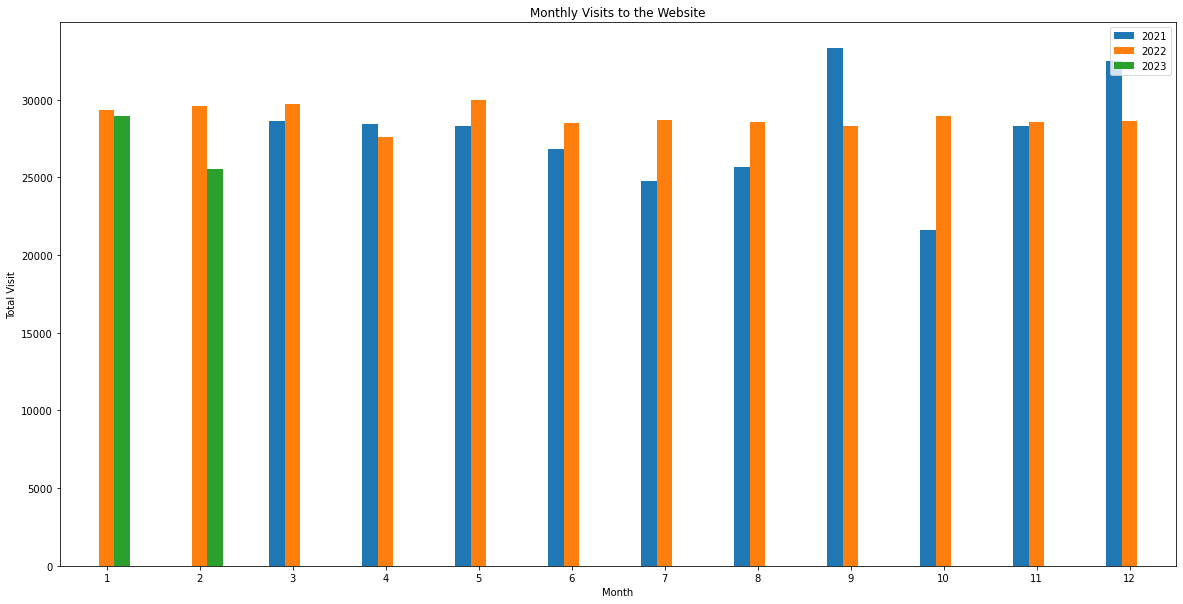

In [60]:
# Different Indicators (KPIs) & Graphs around Turnover
## Forth Indicator : Monthly Visits with a Purchase to the Website 
monthly_visit.pivot(index='Purchase_Month', columns='Purchase_Year', values='Number_of_Visits').plot(kind='bar', figsize = (20,10))
plt.xticks(rotation=0)
plt.xlabel('Month')
plt.ylabel('Total Visit')
plt.title('Monthly Visits to the Website')
plt.legend(loc='upper right')
plt.show()

In [61]:
# Different Indicators (KPIs) & Graphs around Turnover
## Fifth Indicator : Revenue Per Product : LORENZ CURVE
## To have an overview of turnover distribution over each product
turnover_per_product = final_df.drop(columns=['categ','session_id','Purchase_time','Purchase_Year','Purchase_Month','Purchase_Day',
                                           'birth','age_interval','sex','age'])
turnover_per_product = pd.DataFrame(turnover_per_product)
turnover_per_product

,id_prod,price,client_id
0,0_1518,4.18,c_103
1,0_1627,3.99,c_103
2,0_1104,13.21,c_103
3,0_1390,19.37,c_103
4,0_1547,8.99,c_103
...,...,...,...
679327,0_1509,4.99,c_8114
679328,1_152,11.06,c_240
679329,2_207,50.99,c_305
679330,1_521,22.99,c_305


In [62]:
# Different Indicators (KPIs) & Graphs around Turnover
## Fifth Indicator : Revenue Per Product : LORENZ CURVE
## To have an overview of turnover distribution over each product
turnover_per_product = turnover_per_product.groupby(['id_prod'])[["price"]].sum()
turnover_per_product = turnover_per_product.set_axis(['Total_CA'], axis=1, inplace=False)
turnover_per_product = pd.DataFrame(turnover_per_product)
turnover_per_product = turnover_per_product.sort_values(by=['Total_CA'], ascending=False)
turnover_per_product

,Total_CA
id_prod,
2_159,94893.50
2_135,69334.95
2_112,65407.76
2_102,60736.78
2_209,56971.86
...,...
0_1601,1.99
0_807,1.99
0_1653,1.98


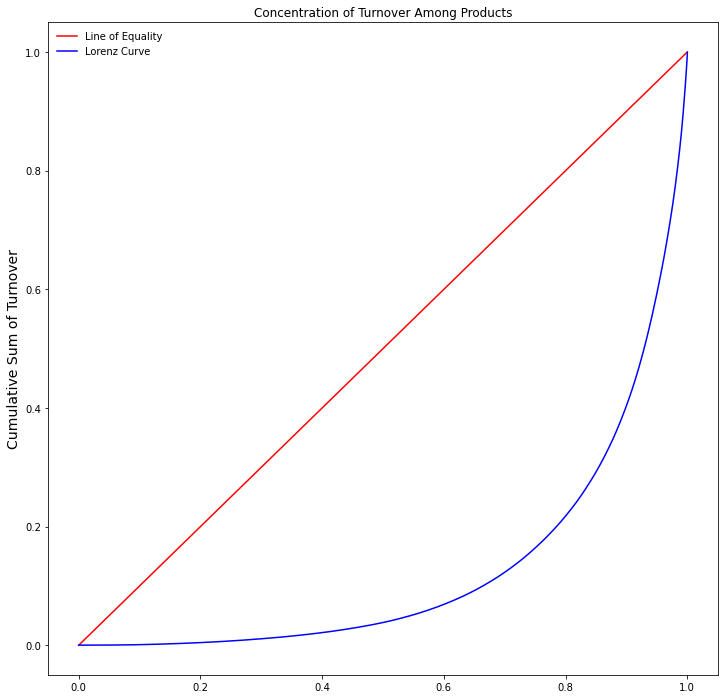

In [63]:
# Different Indicators (KPIs) & Graphs around Turnover
## Fifth Indicator : Revenue Per Product : LORENZ CURVE

fig, ax = plt.subplots(figsize=[12,12])

product = turnover_per_product['Total_CA']
prod = product.values
n = len(prod)
lorenz = np.cumsum(np.sort(prod)) / prod.sum()
lorenz = np.insert(lorenz, 0, 0)
xaxis = np.linspace(0-1/n,1+1/n,n+1)

plt.plot([0,1], [0,1], color='red', label = 'Line of Equality')
plt.plot(xaxis,lorenz, color='blue', label = 'Lorenz Curve')
plt.title("Concentration of Turnover Among Products")
plt.ylabel('Cumulative Sum of Turnover', fontsize=14)
plt.legend(loc = 'best', frameon = False)
plt.show()

In [64]:
## 50% of CA is concentrated by 7% of the products:
np.interp(0.5, lorenz, np.linspace(0,1,n+1))

0.9289022540505804

In [65]:
## 80% of CA is concentrated by 2% of the products:
np.interp(0.8, lorenz, np.linspace(0,1,n+1))

0.9833249995352255

In [66]:
## Gini index:
# < 0.2 represents perfect income equality
# 0.2–0.3 relative equality 
# 0.3–0.4 adequate equality
# 0.4–0.5 big income gap
# above 0.5 represents severe income gap
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC
gini = 2*S
gini

0.74289817121857

In [67]:
# Turnover Development over Time
turnover_per_time = final_df.drop(columns=['categ','session_id','Purchase_time','Purchase_Day','client_id','sex',
                                           'birth','birth','age','age_interval'])
turnover_per_time = pd.DataFrame(turnover_per_time)
turnover_per_time = pd.DataFrame(turnover_per_time[['Purchase_Year','Purchase_Month','price']].groupby(['Purchase_Year','Purchase_Month']).sum())
turnover_per_time = turnover_per_time.set_axis(['Total_CA'], axis=1, inplace=False)
turnover_per_time.reset_index(inplace=True)
turnover_per_time

,Purchase_Year,Purchase_Month,Total_CA
0,2021,3,482440.61
1,2021,4,476109.30
2,2021,5,492943.47
3,2021,6,484088.56
4,2021,7,482835.40
5,2021,8,482284.79
6,2021,9,507240.68
7,2021,10,320798.74
8,2021,11,516167.73
9,2021,12,525917.28


In [68]:
# Turnover Development over Time
turnover_per_time['DATE'] = pd.to_datetime(turnover_per_time.Purchase_Year.astype(str) + '/' + turnover_per_time.Purchase_Month.astype(str))
turnover_per_time2 = pd.DataFrame(turnover_per_time)
turnover_per_time2 = turnover_per_time2.drop(columns=['Purchase_Year','Purchase_Month'])
turnover_per_time2

,Total_CA,DATE
0,482440.61,2021-03-01
1,476109.30,2021-04-01
2,492943.47,2021-05-01
3,484088.56,2021-06-01
4,482835.40,2021-07-01
5,482284.79,2021-08-01
6,507240.68,2021-09-01
7,320798.74,2021-10-01
8,516167.73,2021-11-01
9,525917.28,2021-12-01


In [69]:
# Turnover Development over Time
first_column = turnover_per_time2.pop('DATE')
turnover_per_time2.insert(0, 'DATE', first_column)
turnover_per_time2 = pd.DataFrame(turnover_per_time2)
turnover_per_time2  = turnover_per_time2.set_index('DATE')
turnover_per_time2

,Total_CA
DATE,
2021-03-01,482440.61
2021-04-01,476109.30
2021-05-01,492943.47
2021-06-01,484088.56
2021-07-01,482835.40
2021-08-01,482284.79
2021-09-01,507240.68
2021-10-01,320798.74
2021-11-01,516167.73


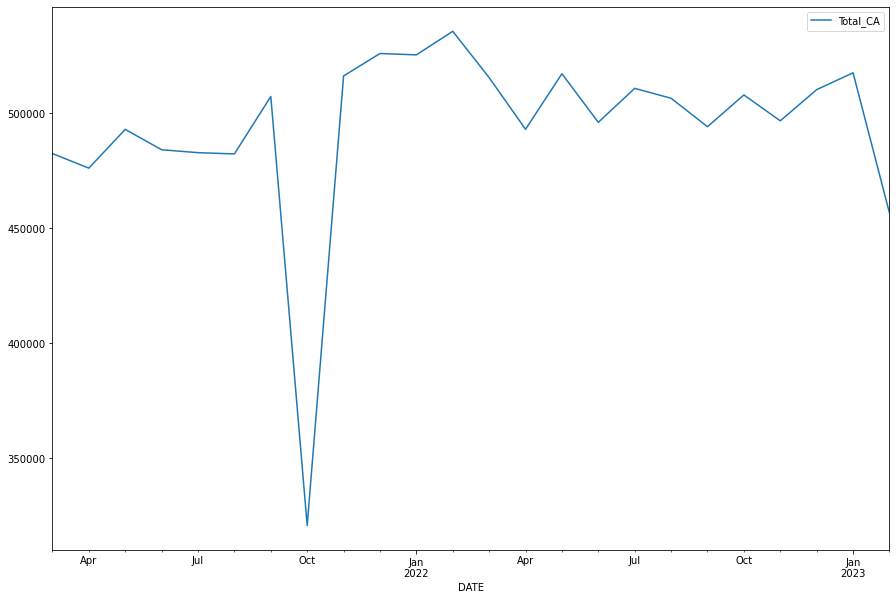

In [70]:
# Turnover Development over Time
## Creation of time series plot in order to decide between Additive and Multiplicative Decompositions
series = pd.DataFrame(turnover_per_time2)
series.plot(figsize=[15,10])
pyplot.show()

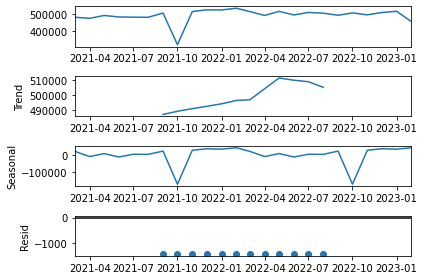

In [71]:
## A moving average decomposition to assess the overall trend : Additive Decompositions
series = pd.DataFrame(turnover_per_time2)
result = seasonal_decompose(series, model='additive', period = 12) ## For monthly data
result.plot()
pyplot.show()

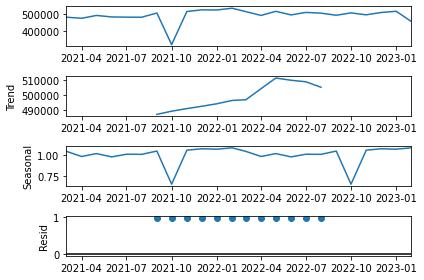

In [72]:
## A moving average decomposition to assess the overall trend : Multiplicative Decomposition
series = pd.DataFrame(turnover_per_time2)
result = seasonal_decompose(series, model='multiplicative', period = 12) ## For monthly data
result.plot()
pyplot.show()

In [73]:
# ANALYSIS ON CUSTOMERS

In [74]:
## Relationship between client's 'gender' VS 'categ' (category of books that are purchased)
## Contingency Table to see how many sales are done for each category amongst women and men
X = "sex"
Y = "categ"
cont = final_df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=False)
cont

categ,0.0,1.0,2.0
sex,,,
f,206103,114899,17283
m,209356,112270,19200


In [75]:
## Relationship between client's 'gender' VS 'categ' (category of books that are purchased)
## Chi-Square Test

stats.chi2_contingency(cont)
## chi2
## p_value
## dof (degree of freedom 
## Rejection of H0 when p_value < confidence level (alpha = 0.05)
## H0: the variables are independent. 
## p < 0.05 therefore we reject the null hypothesis at the 5% threshold, we take H1.

(147.11906816131497,
 1.1310980597090762e-32,
 2,
 array([[206952.24759281, 113159.50583189,  18173.2465753 ],
        [208506.75240719, 114009.49416811,  18309.7534247 ]]))

In [76]:
## Relationship between client's 'age' VS purchased amount (total amount of books that are purchased)
## 2 quantitative variables
gender_vs_CA = final_df.drop(columns=['categ','session_id','Purchase_time','Purchase_Year','Purchase_Month','Purchase_Day',
                                           'client_id','sex','birth','age_interval'])
gender_vs_CA = pd.DataFrame(gender_vs_CA)
gender_vs_CA = gender_vs_CA.groupby(['age'])[["price"]].sum()
gender_vs_CA = gender_vs_CA.set_axis(['Total_CA'], axis=1, inplace=False)
gender_vs_CA.reset_index(inplace=True)
gender_vs_CA

,age,Total_CA
0,17,609013.69
1,18,178195.78
2,19,184177.35
3,20,178497.70
4,21,165007.98
...,...,...
71,88,5254.35
72,89,5043.19
73,90,2815.45
74,91,4013.87


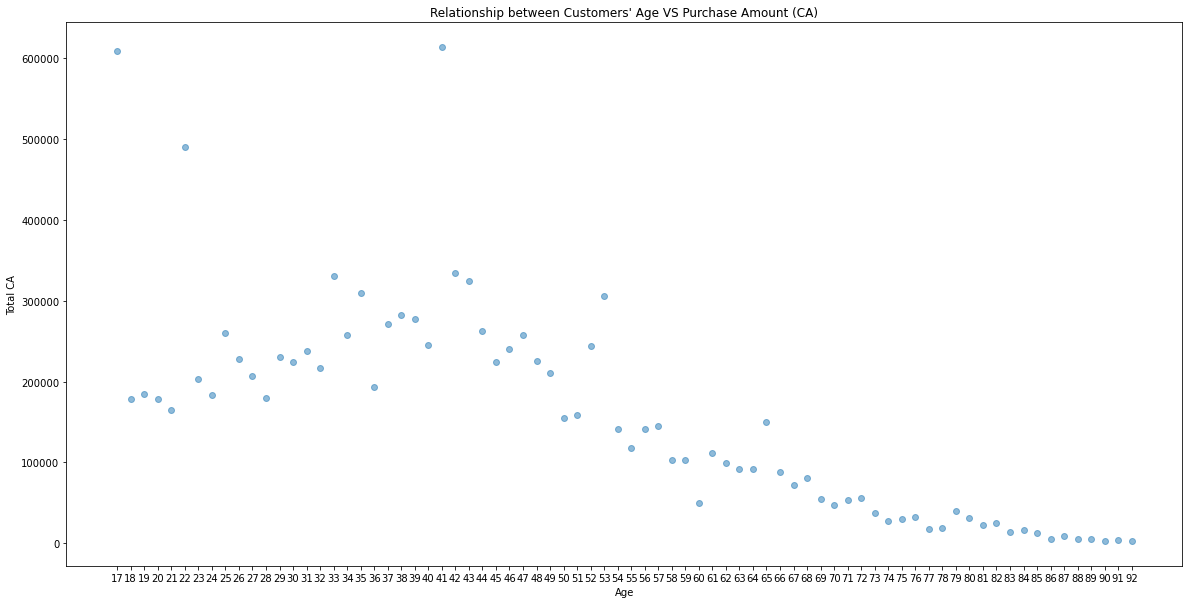

In [77]:
## 2 quantitative variables : Scatter Plot Graph
plt.figure(figsize=(20,10))
Age = gender_vs_CA['age']
CA = gender_vs_CA['Total_CA']
plt.xticks(Age)
plt.plot(Age,CA,'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Total CA")
plt.title("Relationship between Customers' Age VS Purchase Amount (CA)")
plt.show()
## There is a positive linear relationship between customer's age and total amount CA between the age 17 - 43
## The magnitude is moderately strong. 
## There is a negative linear relationship between customer's age and total amount CA between the age 43 - 92
## The magnitude is  strong. 

In [78]:
## Relationship between client's 'age' VS purchased amount (total amount of books that are purchased)
## Pearson's Coefficient: 1 implies that a linear equation describes the relationship between X and Y perfectly, 
## with all data points lying on a line. The correlation sign is determined by the regression slope: 
## a value of +1 implies that all data points lie on a line for which Y increases as X increases, 
## and vice versa for -1.A value of 0 implies that there is no linear dependency between the variables

In [79]:
## Pearson's Coefficient: Degree of correlation:
# Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, 
# the other variable tends to also increase (if positive) or decrease (if negative).
# High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
# Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
# Low degree: When the value lies below + .29, then it is said to be a small correlation.
# No correlation: When the value is zero.

In [80]:
## Pearson's Coefficient:Correlation on the other hand measures both the strength and direction of the linear relationship between two variables.

Age = gender_vs_CA['age']
CA = gender_vs_CA['Total_CA']

st.pearsonr(Age,CA)[0]

-0.7788810457117026

In [81]:
## the covariance : Covariance indicates the direction of the linear relationship between variables
np.cov(Age, CA,ddof=0)[1,0]

-2229924.0965787238

In [82]:
## Linear Regression: 
p1 = np.polyfit(Age,CA,1)
p1

array([ -4633.60851237, 408501.77813475])

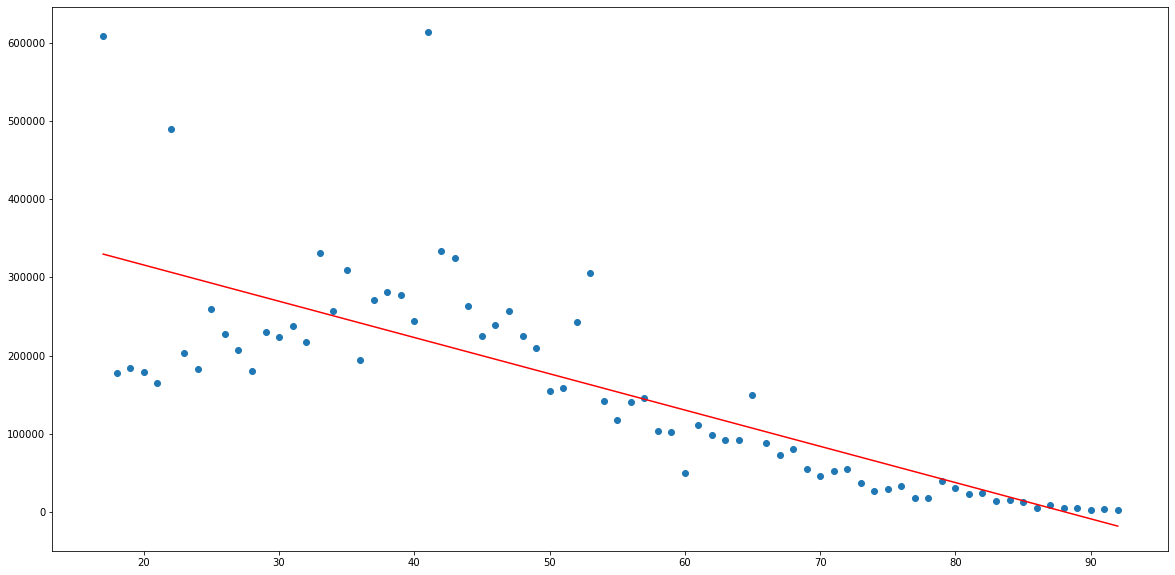

In [83]:
from matplotlib.pyplot import *
plt.figure(figsize=(20,10))
plot(Age,CA,'o')
plot(Age, np.polyval(p1, Age),'r-')

In [84]:
## Rsquare  is in fact the square of the linear correlation coefficient (Pearson's Coeff.)
slope, intercept, r_value, p_value, std_err = st.linregress(Age,CA)
print(pow(r_value,2))

0.6066556833689548


In [85]:
## Outliers
outliers=gender_vs_CA[['age','Total_CA']]
outliers=pd.DataFrame(outliers)
outliers

,age,Total_CA
0,17,609013.69
1,18,178195.78
2,19,184177.35
3,20,178497.70
4,21,165007.98
...,...,...
71,88,5254.35
72,89,5043.19
73,90,2815.45
74,91,4013.87


In [86]:
## Outliers
def remove_outlier_IQR(outliers):
    Q1=outliers.quantile(0.25)
    Q3=outliers.quantile(0.75)
    IQR=Q3-Q1
    outliers_final=outliers[~((outliers<(Q1-1.5*IQR)) | (outliers>(Q3+1.5*IQR)))]
    return outliers_final

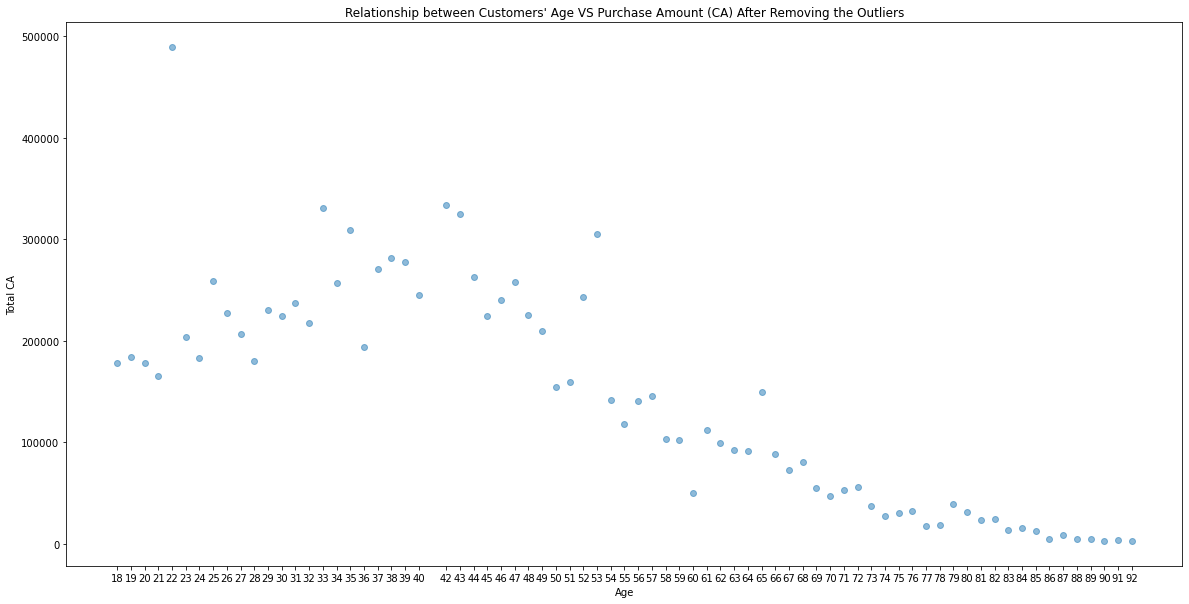

In [87]:
df_outlier_removed=remove_outlier_IQR(outliers.Total_CA)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=outliers.index.difference(df_outlier_removed.index)
for i in range(0, len(ind_diff),1):
    outliers_final=outliers.drop([ind_diff[i]])
    outliers=outliers_final    
plt.figure(figsize=(20,10))
Age2 = outliers_final['age']
CA2 = outliers_final['Total_CA']
plt.xticks(Age2)
plt.plot(Age2,CA2,'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Total CA")
plt.title("Relationship between Customers' Age VS Purchase Amount (CA) After Removing the Outliers")
plt.show()    

In [88]:
## Linear Regression: After Outliers
p1 = np.polyfit(Age2,CA2,1)
p1

array([ -4168.05802849, 373695.26214016])

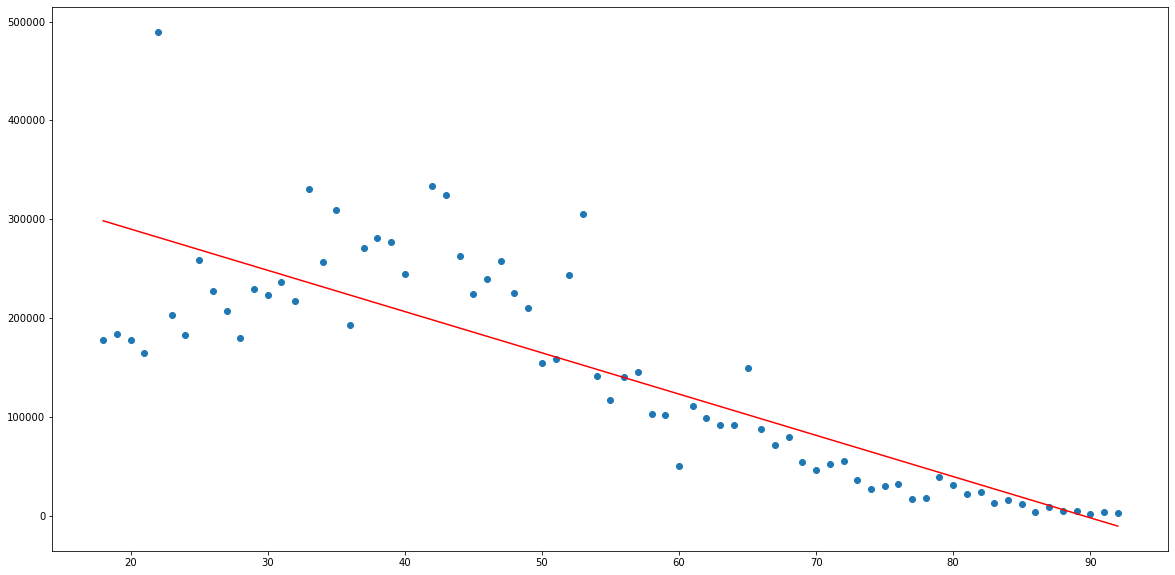

In [89]:
plt.figure(figsize=(20,10))
plot(Age2,CA2,'o')
plot(Age2, np.polyval(p1, Age2),'r-')

In [90]:
## Rsquare  is in fact the square of the linear correlation coefficient (Pearson's Coeff.) After Outliers
slope, intercept, r_value, p_value, std_err = st.linregress(Age2,CA2)
print(pow(r_value,2))

0.6991021373223976


In [91]:
## Relationship between client's 'age' VS Purchase Frequency
## 2 quantitative variables
## Purchase Frequency: divide the total number of orders by the number of unique customers for the same time frame
purchase_frequency = final_df.drop(columns=['categ','Purchase_time','Purchase_Year','Purchase_Month',
                                           'Purchase_Day','sex','birth','age_interval'])
purchase_frequency = pd.DataFrame(purchase_frequency)
purchase_frequency

,id_prod,price,session_id,client_id,age
0,0_1518,4.18,s_211425,c_103,35
1,0_1627,3.99,s_225494,c_103,35
2,0_1104,13.21,s_338755,c_103,35
3,0_1390,19.37,s_23078,c_103,35
4,0_1547,8.99,s_179629,c_103,35
...,...,...,...,...,...
679327,0_1509,4.99,s_34762,c_8114,59
679328,1_152,11.06,s_116675,c_240,23
679329,2_207,50.99,s_42418,c_305,25
679330,1_521,22.99,s_284060,c_305,25


In [92]:
len(purchase_frequency.index)

679111

In [93]:
purchase_frequency_df = purchase_frequency.groupby(['age'])[["price"]].count()
purchase_frequency_df = purchase_frequency_df.set_axis(['Total N° Customers'], axis=1, inplace=False)
purchase_frequency_df

,Total N° Customers
age,
17,15149
18,4371
19,4584
20,4252
21,4413
...,...
88,326
89,311
90,170


In [94]:
overall_total_transaction = (purchase_frequency_df[['Total N° Customers']]) / (len(purchase_frequency.index))
overall_total_transaction = overall_total_transaction.set_axis(['Frequency'], axis=1, inplace=False)
overall_total_transaction.reset_index(inplace=True)
overall_total_transaction

,age,Frequency
0,17,0.022307
1,18,0.006436
2,19,0.006750
3,20,0.006261
4,21,0.006498
...,...,...
71,88,0.000480
72,89,0.000458
73,90,0.000250
74,91,0.000333


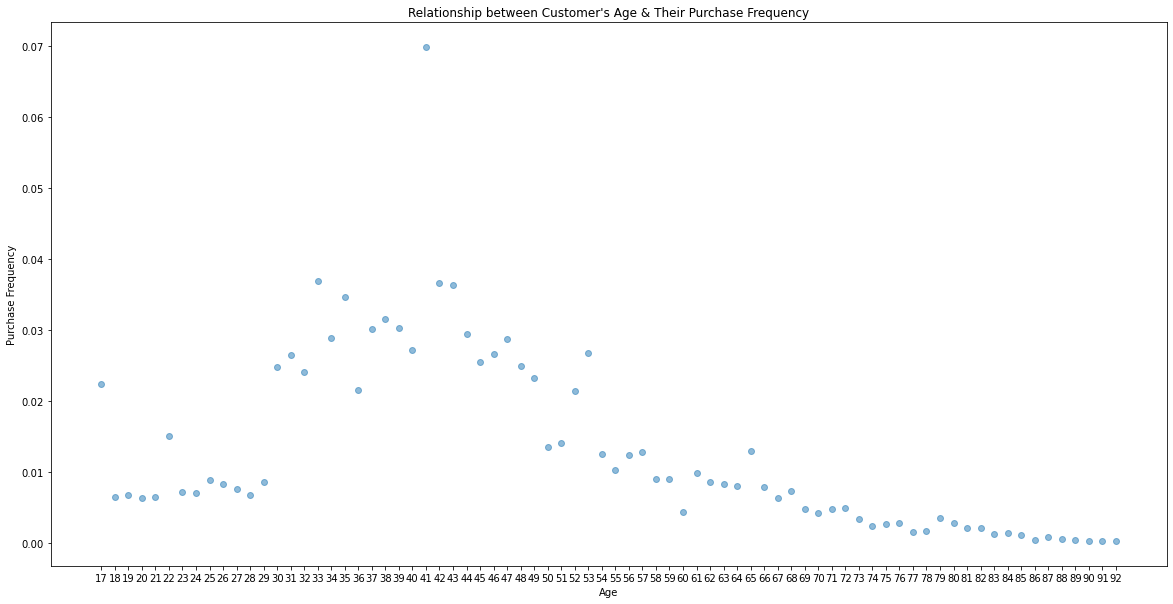

In [95]:
## 2 quantitative variables : Scatter Plot Graph
plt.figure(figsize=(20,10))
Age = overall_total_transaction['age']
Frequency = overall_total_transaction['Frequency']
plt.xticks(Age)
plt.plot(Age,Frequency,'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Purchase Frequency")
plt.title("Relationship between Customer's Age & Their Purchase Frequency")
plt.show()

In [96]:
## Pearson's Coefficient:
Age = overall_total_transaction['age']
Frequency = overall_total_transaction['Frequency']

st.pearsonr(Age,Frequency)[0]

-0.5337344271238332

In [97]:
## the covariance
np.cov(Age, Frequency,ddof=0)[1,0]

-0.14883090385425715

In [98]:
## Linear Regression: 
p1 = np.polyfit(Age,Frequency,1)
p1 

array([-0.00030926,  0.03001251])

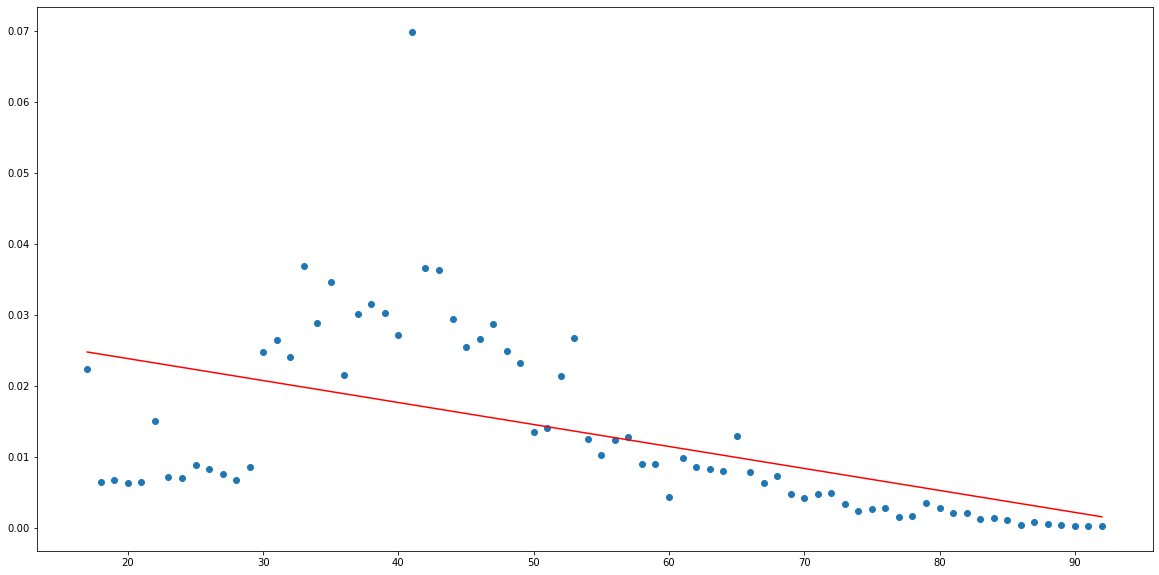

In [99]:
plt.figure(figsize=(20,10))
plot(Age,Frequency,'o')
plot(Age, np.polyval(p1, Age),'r-')

In [100]:
## Rsquare  is in fact the square of the linear correlation coefficient (Pearson's Coeff.)
slope, intercept, r_value, p_value, std_err = st.linregress(Age,Frequency)
print(pow(r_value,2))

0.2848724386972068


In [101]:
## Outliers
outliers=overall_total_transaction[['age','Frequency']]
outliers=pd.DataFrame(outliers)
outliers

,age,Frequency
0,17,0.022307
1,18,0.006436
2,19,0.006750
3,20,0.006261
4,21,0.006498
...,...,...
71,88,0.000480
72,89,0.000458
73,90,0.000250
74,91,0.000333


In [102]:
## OUTLIERS
def remove_outlier_IQR(outliers):
    Q1=outliers.quantile(0.25)
    Q3=outliers.quantile(0.75)
    IQR=Q3-Q1
    outliers_final=outliers[~((outliers<(Q1-1.5*IQR)) | (outliers>(Q3+1.5*IQR)))]
    return outliers_final

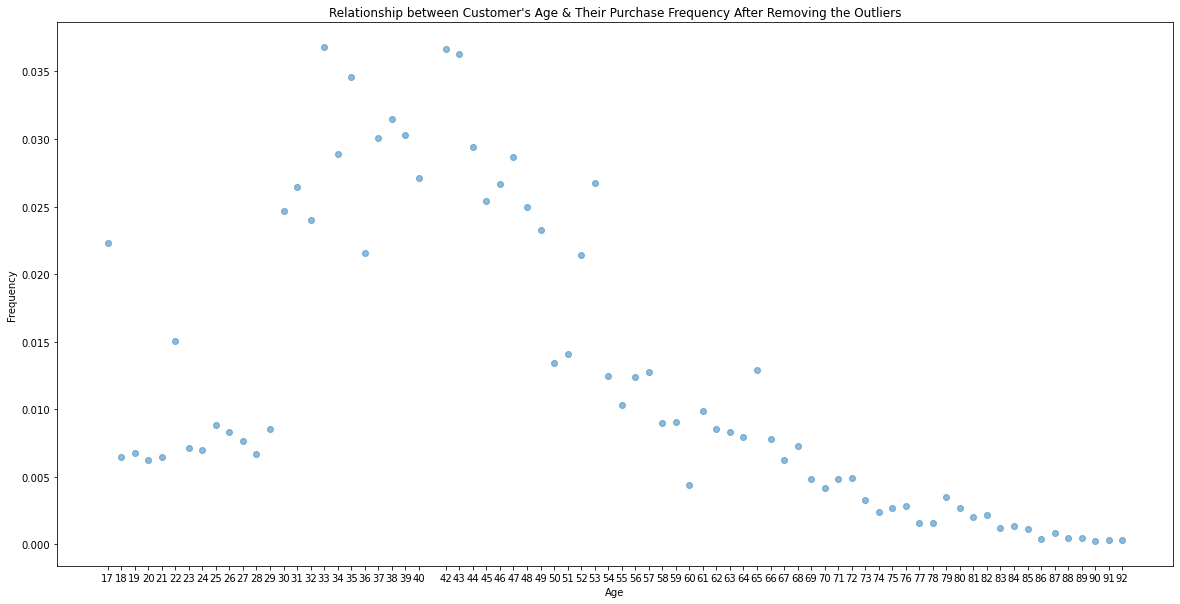

In [103]:
df_outlier_removed=remove_outlier_IQR(outliers.Frequency)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=outliers.index.difference(df_outlier_removed.index)
for i in range(0, len(ind_diff),1):
    outliers_final=outliers.drop([ind_diff[i]])
    outliers=outliers_final    
plt.figure(figsize=(20,10))
Age2 = outliers_final['age']
Frequency2 = outliers_final['Frequency']
plt.xticks(Age2)
plt.plot(Age2,Frequency2,'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Relationship between Customer's Age & Their Purchase Frequency After Removing the Outliers")
plt.show() 

In [104]:
p1 = np.polyfit(Age2,Frequency2,1)
p1 

array([-0.00028953,  0.02823411])

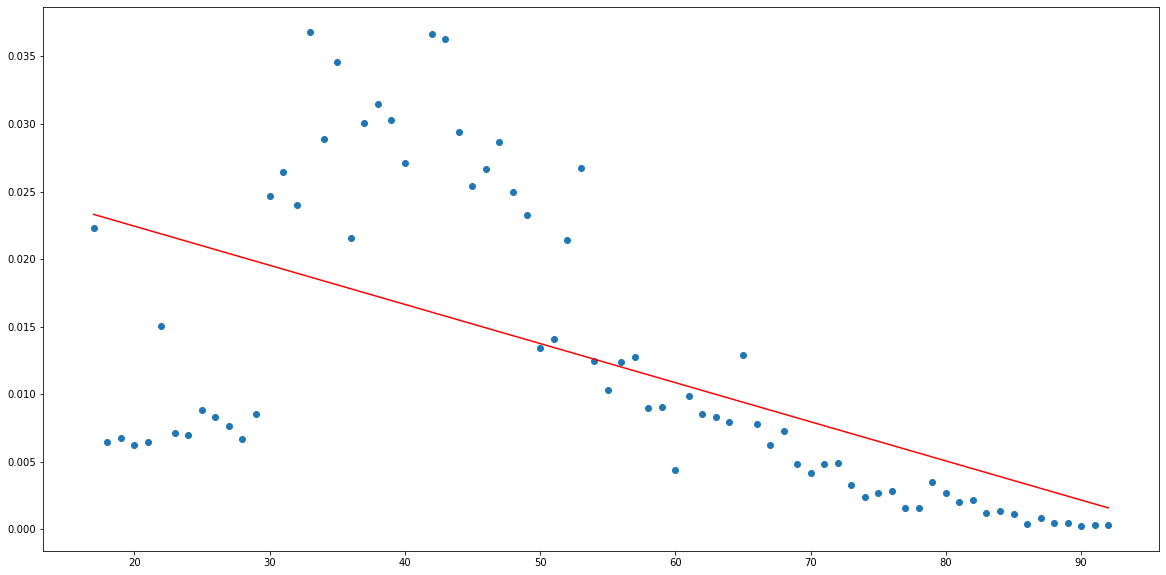

In [105]:
plt.figure(figsize=(20,10))
plot(Age2,Frequency2,'o')
plot(Age2, np.polyval(p1, Age2),'r-')

In [106]:
## Rsquare  is in fact the square of the linear correlation coefficient (Pearson's Coeff.)
slope, intercept, r_value, p_value, std_err = st.linregress(Age2,Frequency2)
print(pow(r_value,2))

0.33793020058599826


In [107]:
## Relationship btw Customer's Age VS Average Basket Size
## 2 quantitative variables
basket_size = final_df.drop(columns=['id_prod','categ','Purchase_time','Purchase_Year','Purchase_Month',
                                           'Purchase_Day','sex','birth','age_interval'])
basket_size = pd.DataFrame(basket_size)
basket_size = basket_size.groupby(['age'])[["price"]].mean()
basket_size = basket_size.set_axis(['AVG_Montant_du_Panier'], axis=1, inplace=False)
basket_size = pd.DataFrame(basket_size)
basket_size.reset_index(inplace=True)
basket_size

,age,AVG_Montant_du_Panier
0,17,40.201577
1,18,40.767737
2,19,40.178305
3,20,41.979704
4,21,37.391339
...,...,...
71,88,16.117638
72,89,16.216045
73,90,16.561471
74,91,17.760487


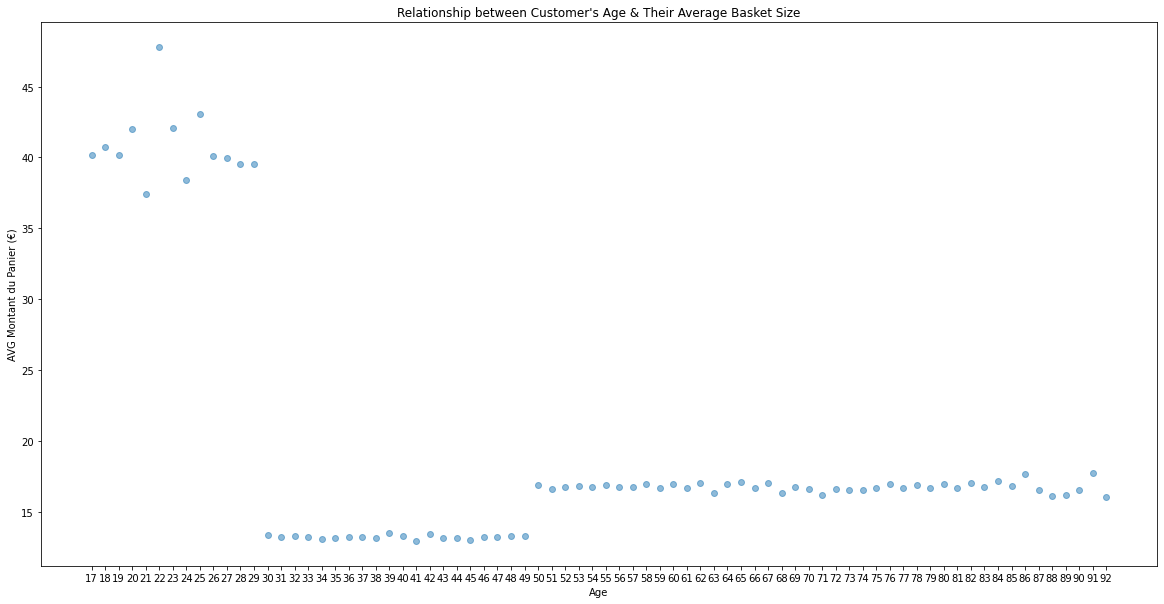

In [108]:
## 2 quantitative variables : Scatter Plot Graph
plt.figure(figsize=(20,10))
Age = basket_size['age']
Panier = basket_size['AVG_Montant_du_Panier']
plt.xticks(Age)
plt.plot(Age,Panier,'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("AVG Montant du Panier (€)")
plt.title("Relationship between Customer's Age & Their Average Basket Size")
plt.show()

## We can see that there does not appear to be a meaningful relationship between Customer's Age and their Montant du Panier

In [109]:
## Pearson's Coefficient:
Age = basket_size['age']
Panier = basket_size['AVG_Montant_du_Panier']

st.pearsonr(Age,Panier)[0]

-0.5478614363790852

In [110]:
## the covariance
np.cov(Age, Panier,ddof=0)[1,0]

-116.19465675663483

In [111]:
## Linear Regression: 
p1 = np.polyfit(Age,Panier,1)
p1 

array([-0.24144344, 33.1100763 ])

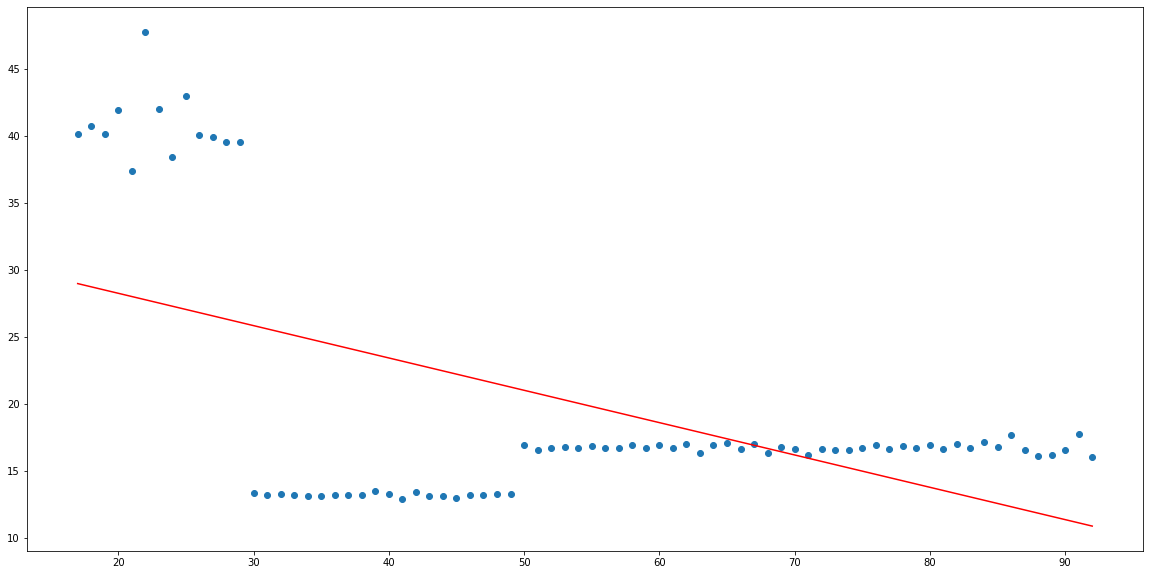

In [112]:
plt.figure(figsize=(20,10))
plot(Age,Panier,'o')
plot(Age, np.polyval(p1, Age),'r-')

In [113]:
## Rsquare  is in fact the square of the linear correlation coefficient (Pearson's Coeff.)
slope, intercept, r_value, p_value, std_err = st.linregress(Age,Panier)
print(pow(r_value,2))

0.3001521534713547


In [114]:
## Outliers
outliers=basket_size[['age','AVG_Montant_du_Panier']]
outliers=pd.DataFrame(outliers)
outliers = outliers.set_axis(['age','Panier'], axis=1, inplace=False)
outliers

,age,Panier
0,17,40.201577
1,18,40.767737
2,19,40.178305
3,20,41.979704
4,21,37.391339
...,...,...
71,88,16.117638
72,89,16.216045
73,90,16.561471
74,91,17.760487


In [115]:
## OUTLIERS
def remove_outlier_IQR(outliers):
    Q1=outliers.quantile(0.25)
    Q3=outliers.quantile(0.75)
    IQR=Q3-Q1
    outliers_final=outliers[~((outliers<(Q1-1.5*IQR)) | (outliers>(Q3+1.5*IQR)))]
    return outliers_final

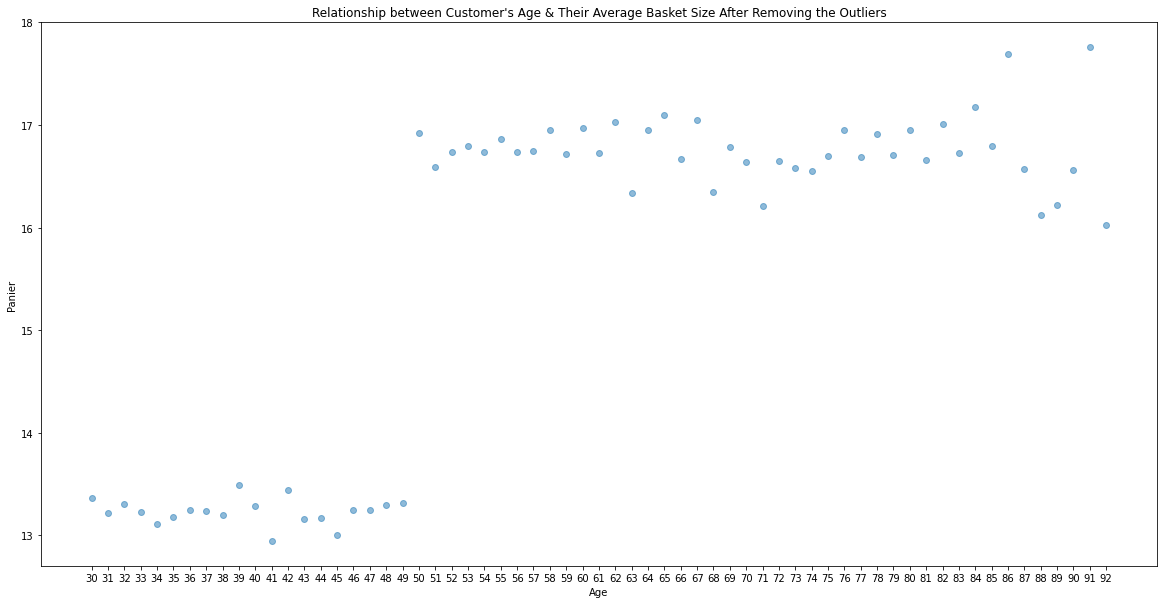

In [116]:
df_outlier_removed=remove_outlier_IQR(outliers.Panier)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=outliers.index.difference(df_outlier_removed.index)
for i in range(0, len(ind_diff),1):
    outliers_final=outliers.drop([ind_diff[i]])
    outliers=outliers_final    
plt.figure(figsize=(20,10))
Age2 = outliers_final['age']
Panier2 = outliers_final['Panier']
plt.xticks(Age2)
plt.plot(Age2,Panier2,'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Panier")
plt.title("Relationship between Customer's Age & Their Average Basket Size After Removing the Outliers")
plt.show() 

In [117]:
## LINEAR REGRESSION: 
p1 = np.polyfit(Age2,Panier2,1)
p1 

array([ 0.0723789, 11.2237633])

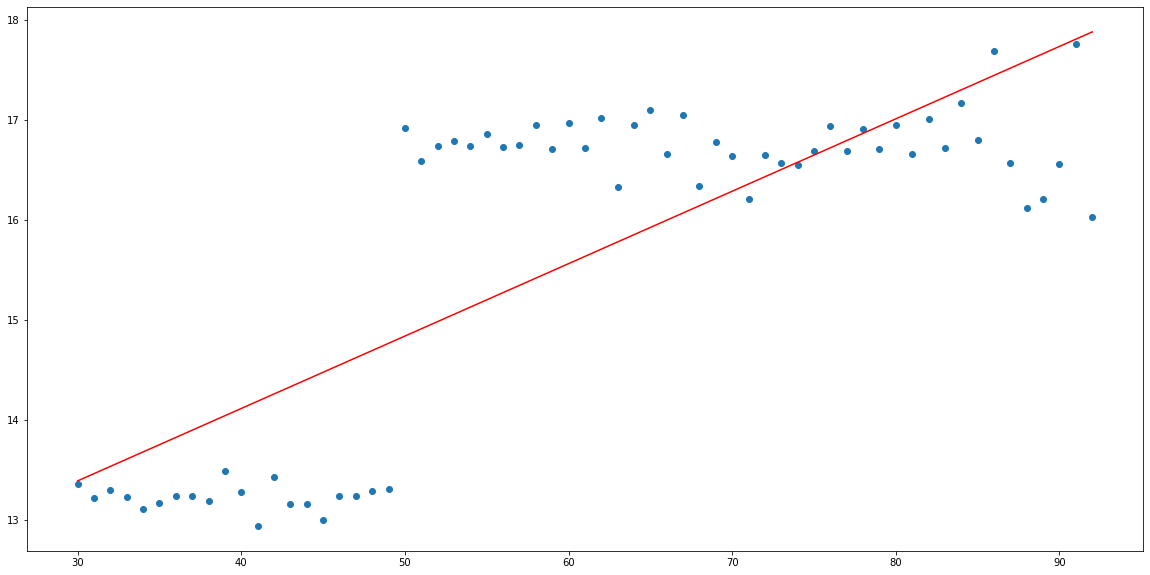

In [118]:
plt.figure(figsize=(20,10))
plot(Age2,Panier2,'o')
plot(Age2, np.polyval(p1, Age2),'r-')

In [119]:
## Rsquare  is in fact the square of the linear correlation coefficient (Pearson's Coeff.)
slope, intercept, r_value, p_value, std_err = st.linregress(Age2,Panier2)
print(pow(r_value,2))

0.6246811540744461


In [120]:
## Relationship between client's 'age' VS 'categ' (category of books that are purchased)
## 1 quantitative & 1 qualitative variables
age_vs_category = final_df.drop(columns=['session_id','Purchase_time','Purchase_Year','Purchase_Month','Purchase_Day',
                                           'sex','birth'])
age_vs_category = pd.DataFrame(age_vs_category)
age_vs_category = age_vs_category.groupby(['age','categ'])[["price"]].count()
age_vs_category = age_vs_category.set_axis(['Number_of_Sales'], axis=1, inplace=False)
age_vs_category = pd.DataFrame(age_vs_category)
age_vs_category.reset_index(inplace=True)
age_vs_category['categ'] = age_vs_category['categ'].astype('str')
age_vs_category

,age,categ,Number_of_Sales
0,17,0.0,3418
1,17,1.0,5719
2,17,2.0,6012
3,18,0.0,909
4,18,1.0,1678
...,...,...,...
223,91,1.0,149
224,91,2.0,2
225,92,0.0,78
226,92,1.0,122


In [121]:
data = pd.DataFrame(age_vs_category)
data

,age,categ,Number_of_Sales
0,17,0.0,3418
1,17,1.0,5719
2,17,2.0,6012
3,18,0.0,909
4,18,1.0,1678
...,...,...,...
223,91,1.0,149
224,91,2.0,2
225,92,0.0,78
226,92,1.0,122


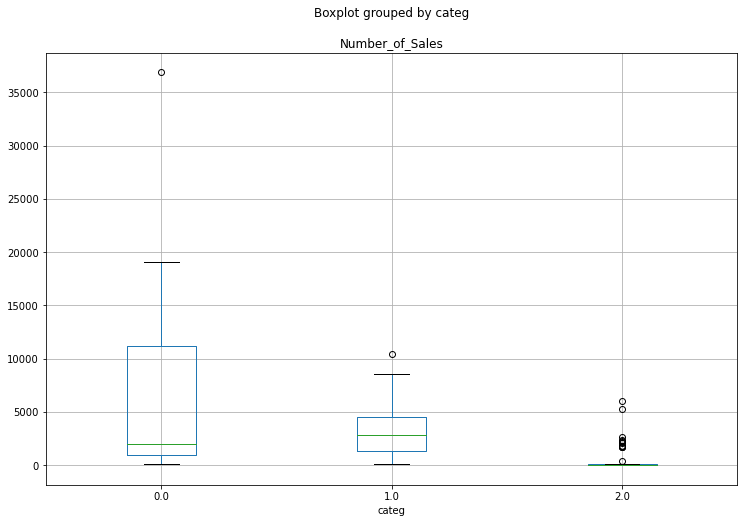

In [122]:
## Relationship between client's 'age' VS 'categ' (category of books that are purchased)
## 1 quantitative & 1 qualitative variables : BoxPlot Graph
data.boxplot('Number_of_Sales', by='categ', figsize=(12, 8))

grps = pd.unique(data.categ.values)
d_data = {grp:data['Number_of_Sales'][data.categ == grp] for grp in grps}
d_data
k = len(pd.unique(data.categ))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('categ').size()[0] #Participants in each condition

In [123]:
## 1 quantitative & 1 qualitative variables : ANOVA Test
f, p = stats.f_oneway(d_data['0.0'], d_data['1.0'], d_data['2.0'])
f, p

(25.602185168336632, 9.59614617720252e-11)

In [124]:
## 1 quantitative & 1 qualitative variables : ANOVA Test
mod = ols('Number_of_Sales ~ categ', data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
aov_table
## H0 = there is no difference in means
## p_value < 0.05, we reject H0 (a significant difference does exist) 

,sum_sq,df,F,PR(>F)
categ,9.448995e+08,2.0,25.602185,9.596146e-11
Residual,4.152036e+09,225.0,NaN,NaN


In [125]:
age_vs_category2 = final_df.drop(columns=['session_id','Purchase_time','Purchase_Year','Purchase_Month','Purchase_Day',
                                           'sex','birth'])
age_vs_category2 = pd.DataFrame(age_vs_category2)
age_vs_category2 = age_vs_category2.groupby(['age_interval','categ'])[["price"]].count()
age_vs_category2 = age_vs_category2.set_axis(['Total_Number'], axis=1, inplace=False)
age_vs_category2 = pd.DataFrame(age_vs_category2)
age_vs_category2.reset_index(inplace=True)
age_vs_category2

,age_interval,categ,Total_Number
0,18-29,0.0,26151
1,18-29,1.0,28071
2,18-29,2.0,27253
3,30-39,0.0,150442
4,30-39,1.0,46561
5,30-39,2.0,762
6,40-49,0.0,160051
7,40-49,1.0,52850
8,40-49,2.0,712
9,50-59,0.0,40059


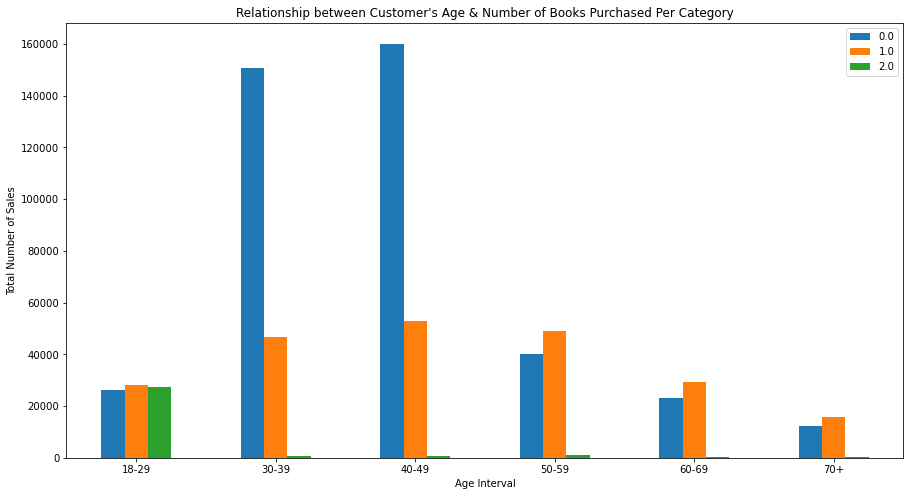

In [126]:
age_vs_category2.pivot(index='age_interval', columns='categ', values='Total_Number').plot(kind='bar', figsize = (15,8))
plt.xticks(rotation=0)
plt.xlabel('Age Interval')
plt.ylabel('Total Number of Sales')
plt.title("Relationship between Customer's Age & Number of Books Purchased Per Category")
plt.legend(loc='upper right')
plt.show()

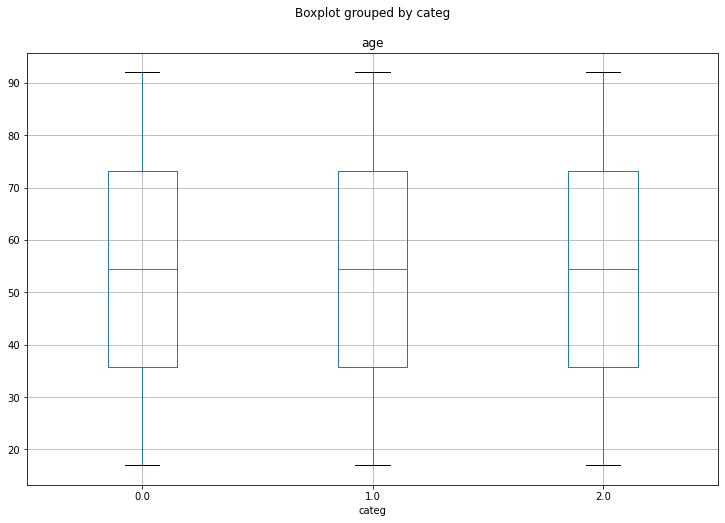

In [127]:
## Relationship between client's 'age' VS 'categ' (category of books that are purchased)
## 1 quantitative & 1 qualitative variables : BoxPlot Graph
data.boxplot('age', by='categ', figsize=(12, 8))

grps = pd.unique(data.categ.values)
d_data = {grp:data['age'][data.categ == grp] for grp in grps}

k = len(pd.unique(data.categ))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('categ').size()[0] #Participants in each condition

In [128]:
## 1 quantitative & 1 qualitative variables : ANOVA Test
mod = ols('age ~ categ', data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
aov_table
## H0 = there is no difference in means
## p_value > 0.05, we cannot reject H0 (not statistically significant and indicates strong evidence for the null hypothesis) 

,sum_sq,df,F,PR(>F)
categ,1.744095e-26,2.0,1.788204e-29,1.0
Residual,1.097250e+05,225.0,NaN,NaN


In [129]:
f, p = stats.f_oneway(d_data['0.0'], d_data['1.0'], d_data['2.0'])
f, p

(0.0, 1.0)